In [1]:
!pip install feature_engine

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error      
from sklearn.metrics import median_absolute_error, r2_score
import numpy

In [3]:
df = pd.read_csv('/content/drive/MyDrive/FIA_python/TCC/data/ITSA4.csv', sep=',')
df_ibov = pd.read_csv ('/content/drive/MyDrive/FIA_python/TCC/data/Ibov.csv', sep=',')
df_usd = pd.read_csv ('/content/drive/MyDrive/FIA_python/TCC/data/USD.csv', sep=',')

In [4]:
df_ibov.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,21.05.2021,"122.592,47","122.701,44","122.799,36","121.760,37","9,49M","-0,09%"
1,20.05.2021,"122.700,79","122.635,94","122.733,95","122.136,16","7,91M","0,05%"
2,19.05.2021,"122.636,30","122.975,93","123.013,40","121.595,27","8,83M","-0,28%"
3,18.05.2021,"122.979,96","122.937,42","123.543,68","122.549,79","7,84M","0,03%"
4,17.05.2021,"122.937,87","121.880,28","123.074,21","121.680,47","7,41M","0,87%"


In [5]:
df.tail(), df.head()

(            Data Último Abertura Máxima Mínima    Vol.    Var%
 4046  07.01.2005   1,01     1,01   1,03   1,01  11,35M   0,00%
 4047  06.01.2005   1,01     1,02   1,02   1,00   8,45M  -0,98%
 4048  05.01.2005   1,02     1,03   1,04   1,01  11,55M  -0,97%
 4049  04.01.2005   1,03     1,04   1,04   1,02  13,03M   0,00%
 4050  03.01.2005   1,03     1,02   1,04   1,02   8,07M   0,98%,
          Data Último Abertura Máxima Mínima    Vol.    Var%
 0  21.05.2021  10,84    10,79  10,85  10,65  18,44M   0,56%
 1  20.05.2021  10,78    10,74  10,89  10,69  28,26M   0,37%
 2  19.05.2021  10,74    10,54  10,74  10,49  21,00M   1,13%
 3  18.05.2021  10,62    10,55  10,71  10,55  18,78M  -0,28%
 4  17.05.2021  10,65    10,61  10,65  10,45  27,97M   0,09%)

In [6]:
df.count()

Data        4051
Último      4051
Abertura    4051
Máxima      4051
Mínima      4051
Vol.        4051
Var%        4051
dtype: int64

In [7]:
df_aux = df
print(df_aux)

            Data Último Abertura Máxima Mínima    Vol.    Var%
0     21.05.2021  10,84    10,79  10,85  10,65  18,44M   0,56%
1     20.05.2021  10,78    10,74  10,89  10,69  28,26M   0,37%
2     19.05.2021  10,74    10,54  10,74  10,49  21,00M   1,13%
3     18.05.2021  10,62    10,55  10,71  10,55  18,78M  -0,28%
4     17.05.2021  10,65    10,61  10,65  10,45  27,97M   0,09%
...          ...    ...      ...    ...    ...     ...     ...
4046  07.01.2005   1,01     1,01   1,03   1,01  11,35M   0,00%
4047  06.01.2005   1,01     1,02   1,02   1,00   8,45M  -0,98%
4048  05.01.2005   1,02     1,03   1,04   1,01  11,55M  -0,97%
4049  04.01.2005   1,03     1,04   1,04   1,02  13,03M   0,00%
4050  03.01.2005   1,03     1,02   1,04   1,02   8,07M   0,98%

[4051 rows x 7 columns]


# Arrumando a Base de dados

In [8]:
# substituindo ',' por '.' para conseguir trabalhar com os dados.

df_aux['Último']    = df_aux['Último'].str.replace(',','.')
df_aux['Abertura']  = df_aux['Abertura'].str.replace(',','.')
df_aux['Máxima']    = df_aux['Máxima'].str.replace(',','.')
df_aux['Mínima']    = df_aux['Mínima'].str.replace(',','.')
df_aux['Var%']      = df_aux['Var%'].str.replace(',','.')
df_aux['Vol.']      = df_aux['Vol.'].str.replace(',','.')
df_aux['Vol.']      = df_aux['Vol.'].str.replace('M','')
df_aux['Var%']      = df_aux['Var%'].str.replace('%','')
df_aux['Data']      = df_aux['Data'].str.replace('.','-')

df_aux.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,21-05-2021,10.84,10.79,10.85,10.65,18.44,0.56
1,20-05-2021,10.78,10.74,10.89,10.69,28.26,0.37
2,19-05-2021,10.74,10.54,10.74,10.49,21.00,1.13
3,18-05-2021,10.62,10.55,10.71,10.55,18.78,-0.28
4,17-05-2021,10.65,10.61,10.65,10.45,27.97,0.09


In [9]:
# transformando as variáveis em float

df_aux['Último']    = df_aux['Último'].astype(float)
df_aux['Último']    = df_aux['Último'].astype(float)
df_aux['Abertura']  = df_aux['Abertura'].astype(float)
df_aux['Máxima']    = df_aux['Máxima'].astype(float)
df_aux['Mínima']    = df_aux['Mínima'].astype(float)
df_aux['Var%']      = df_aux['Var%'].astype(float)/100
df_aux['Vol.']      = df_aux['Vol.'].astype(float)*1000000
df_aux.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,21-05-2021,10.84,10.79,10.85,10.65,18440000.0,0.0056
1,20-05-2021,10.78,10.74,10.89,10.69,28260000.0,0.0037
2,19-05-2021,10.74,10.54,10.74,10.49,21000000.0,0.0113
3,18-05-2021,10.62,10.55,10.71,10.55,18780000.0,-0.0028
4,17-05-2021,10.65,10.61,10.65,10.45,27970000.0,0.0009


In [10]:
# filtrando as bases para acrescentar
df_aux_2 = df_ibov.filter(['Data','Último']).copy()
df_usd = df_usd.filter(['Data','Último']).copy()

In [11]:
# Renomeando as colunas
df_aux_2.rename(columns={'Último':'ibov'}, inplace=True)
df_usd.rename(columns={'Último': 'usd'}, inplace = True)

In [12]:
# corrigindo a base
df_aux_2['ibov'] = df_aux_2['ibov'].str.replace('.','')
df_aux_2['ibov'] = df_aux_2['ibov'].str.replace(',','.')
df_aux_2['ibov'] = df_aux_2['ibov'].astype(float)

In [13]:
# corrigindo a base USD

df_usd['usd'] = df_usd['usd'].str.replace(',','.').astype(float)

In [14]:
df_aux.describe()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
count,4051.000000,4051.000000,4051.000000,4051.000000,4.051000e+03,4051.000000
mean,5.275858,5.277174,5.343505,5.203360,1.852995e+07,0.000827
std,3.125757,3.128627,3.161084,3.092108,1.049631e+07,0.022157
min,0.970000,0.960000,0.980000,0.930000,1.520000e+06,-0.112200
25%,2.960000,2.960000,3.000000,2.920000,1.149000e+07,-0.011200
50%,4.200000,4.200000,4.240000,4.150000,1.653000e+07,0.000000
75%,7.215000,7.225000,7.265000,7.160000,2.276500e+07,0.012000
max,13.640000,13.490000,13.660000,13.420000,1.169000e+08,0.246100


In [15]:
#Transformando a coluna Data em data objeto em datetime  

df_aux['Data']   = pd.to_datetime(df_aux['Data'])
df_aux_2['Data'] = pd.to_datetime(df_aux_2['Data'])
df_usd['Data']   = pd.to_datetime(df_usd['Data'])

In [16]:
# Juntando as bases
df_aux = df_aux.set_index('Data').join(df_aux_2.set_index('Data'))


In [17]:
df_aux = df_aux.join(df_usd.set_index('Data'), on= 'Data')

In [18]:
df_aux.head()

,Último,Abertura,Máxima,Mínima,Vol.,Var%,ibov,usd
Data,,,,,,,,
2021-05-21,10.84,10.79,10.85,10.65,18440000.0,0.0056,122592.47,NaN
2021-05-20,10.78,10.74,10.89,10.69,28260000.0,0.0037,122700.79,NaN
2021-05-19,10.74,10.54,10.74,10.49,21000000.0,0.0113,122636.30,NaN
2021-05-18,10.62,10.55,10.71,10.55,18780000.0,-0.0028,122979.96,NaN
2021-05-17,10.65,10.61,10.65,10.45,27970000.0,0.0009,122937.87,5.2729


In [19]:
df_aux.max(), df_aux.min()

(Último      1.364000e+01
 Abertura    1.349000e+01
 Máxima      1.366000e+01
 Mínima      1.342000e+01
 Vol.        1.169000e+08
 Var%        2.461000e-01
 ibov        1.250766e+05
 usd         5.885600e+00
 dtype: float64, Último      9.700000e-01
 Abertura    9.600000e-01
 Máxima      9.800000e-01
 Mínima      9.300000e-01
 Vol.        1.520000e+06
 Var%       -1.122000e-01
 ibov        2.360997e+04
 usd         1.538300e+00
 dtype: float64)

In [20]:
df_aux.dtypes

Último      float64
Abertura    float64
Máxima      float64
Mínima      float64
Vol.        float64
Var%        float64
ibov        float64
usd         float64
dtype: object

In [21]:
data = df_aux.query('Data >= "2005-01-01"').sort_values(by='Data', ascending = True).reset_index()

In [22]:
box1 = data['Último']
box2 = data['Abertura']
box3 = data['Máxima']
box4 = data['Mínima']
box5 = data['Vol.']
box6 = data['Var%']

In [23]:
data.describe()

,Último,Abertura,Máxima,Mínima,Vol.,Var%,ibov,usd
count,4051.000000,4051.000000,4051.000000,4051.000000,4.051000e+03,4051.000000,4051.000000,4047.000000
mean,5.275858,5.277174,5.343505,5.203360,1.852995e+07,0.000827,62176.177855,2.754286
std,3.125757,3.128627,3.161084,3.092108,1.049631e+07,0.022157,21532.060700,1.063396
min,0.970000,0.960000,0.980000,0.930000,1.520000e+06,-0.112200,23609.970000,1.538300
25%,2.960000,2.960000,3.000000,2.920000,1.149000e+07,-0.011200,49335.375000,1.943350
50%,4.200000,4.200000,4.240000,4.150000,1.653000e+07,0.000000,58367.050000,2.298800
75%,7.215000,7.225000,7.265000,7.160000,2.276500e+07,0.012000,69674.715000,3.370100
max,13.640000,13.490000,13.660000,13.420000,1.169000e+08,0.246100,125076.630000,5.885600


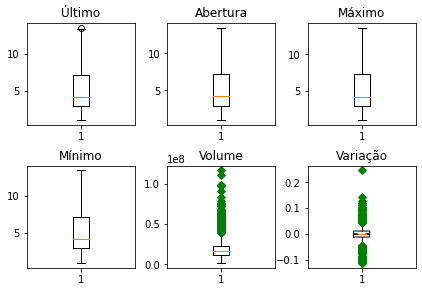

<Figure size 1440x720 with 0 Axes>

In [24]:
fig, axs = plt.subplots(2, 3)
plt.figure(figsize=(20,10))
# último - BOXPLOT
axs[0, 0].boxplot(box1)
axs[0, 0].set_title('Último')

# Abertura - Boxplot
axs[0, 1].boxplot(box2)
axs[0, 1].set_title('Abertura')

# Maximo - Boxplot
axs[0, 2].boxplot(box3)
axs[0, 2].set_title('Máximo')

# Minimo - Boxplot
axs[1, 0].boxplot(box4)
axs[1, 0].set_title('Mínimo')

# Volume - Boxplot
axs[1, 1].boxplot(box5,0,'gD')
axs[1, 1].set_title('Volume')

# Variação - Boxplot
axs[1, 2].boxplot(box6,1,'gD')
axs[1, 2].set_title('Variação')

fig.subplots_adjust(left=0.1, right=1, bottom=0.05, top=0.9,hspace=0.4, wspace=0.3)

plt.show()

# Usando Scikit Learn

In [25]:
df = (
    df_aux
    .sort_values(by='Data', ascending = True)
    .reset_index())

In [26]:
df['mês']            = pd.DatetimeIndex(df.Data).month
df['dia']            = pd.DatetimeIndex(df.Data).day
df['weekday']        = pd.DatetimeIndex(df.Data).weekday
df['dayofyear']      = pd.DatetimeIndex(df.Data).dayofyear
df['valor_atual']    = df['Último'].shift(1).copy()
df['valor_anterior'] = df['Último'].shift(2).copy()
df['diff_valor']     = (df['valor_atual']-df['valor_anterior'])
df['media_mov']      = df['Último'].rolling(3).mean().round(3)


In [27]:
df=df.dropna().copy()

[None, None, None, None, None, None, None, None, None, None, None, None]

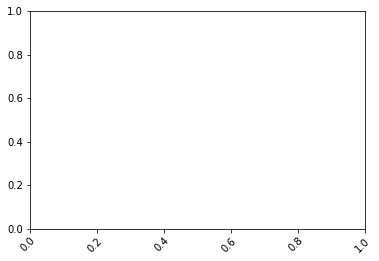

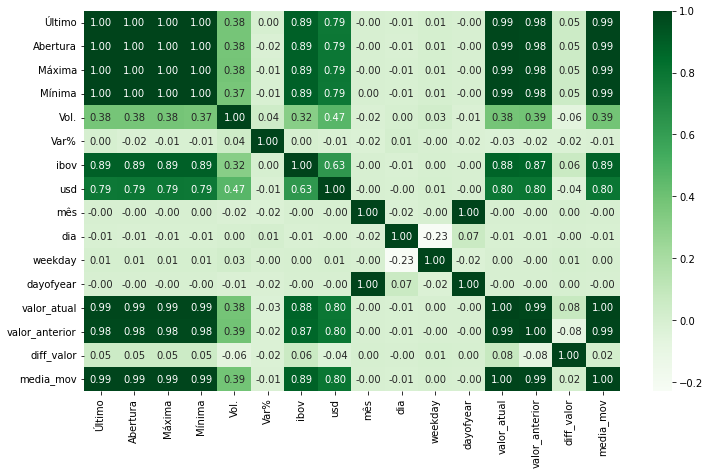

In [28]:
fig, ax = plt.subplots()

plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Greens')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
# plt.show()

In [30]:


target   = 'Último'

cat_vars = (df.select_dtypes(include='object').columns.to_list())
num_vars = [col for col in df.columns if col not in cat_vars + ['Data','Último']]

features = num_vars

In [31]:
y = df[target].copy()
X = df.filter(features).copy()

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3236, 15), (809, 15), (3236,), (809,))

In [34]:
def log_results(modelo_objeto, nome_modelo, X_train, X_test, y_train, y_test):
    
    def adjusted_r2 (yt,ypt,Xt):                                        # Função r2 ajustado
      r2          = r2_score(yt,ypt)
      N           = len(yt)
      p           = Xt.shape[1]
      r2_ajustado = (1-((1-r2)*(N-1))/(N-p-1))
      return r2_ajustado
   
    def mape(yt, ypt):                                                   # Função MAPE
       mape = np.mean(np.abs((yt-ypt)/yt))
       return (mape)

# avaliando o Treino 
    y_pred_train      = modelo_objeto.predict(X_train)    
    r2_train          = round(r2_score(y_train, y_pred_train),3)                        # r2    
    r2_ajustado_train = round(adjusted_r2 (y_train,y_pred_train, X_train),3)            # r2 ajustado       
    mse_train         = round(mean_squared_error (y_train,y_pred_train),2)              # mse
    rmse_train        = round(np.sqrt(mse_train),2)                                     # RMSE   
    rmsle_train       = round(np.sqrt(mean_squared_log_error(y_train, y_pred_train)),3) # RMSLE    
    mae_train         = round(mean_absolute_error(y_train, y_pred_train),2)             # MAE   
    medae_train       = round(median_absolute_error(y_train, y_pred_train),2)           # MedAE  
    mape_train        = round(mape(y_train, y_pred_train),3)                            # MAPE

                    
# Avaliando teste
    y_pred_test = modelo_objeto.predict(X_test)   
    r2          = round(r2_score(y_test, y_pred_test),3)                                # r2    
    r2_ajustado = round(adjusted_r2 (y_test,y_pred_test, X_test),3)                     # r2 ajustado   
    mse         = round(mean_squared_error (y_test,y_pred_test),2)                      # mse
    rmse        = round(np.sqrt(mse),2)                                                 # RMSE    
    rmsle       = round(np.sqrt(mean_squared_log_error(y_test, y_pred_test)),3)         # RMSLE    
    mae         = round(mean_absolute_error(y_test, y_pred_test),2)                     # MAE
    medae       = round(median_absolute_error(y_test, y_pred_test),2)                   # MedAE    
    mape        = round(mape(y_test, y_pred_test),3)                                    # MAPE

 
    results=[]
    results.append([nome_modelo,'treino',r2_train,r2_ajustado_train,mse_train,rmse_train,rmsle_train,mae_train,medae_train,mape_train])
    results.append([nome_modelo,'teste',r2,r2_ajustado,mse,rmse,rmsle,mae,medae,mape])
    df_results = pd.DataFrame(results, columns=['nome_modelo','modo','r2','r2_ajustado','mse','rmse','rmsle','mae','medae','mape'])
    return df_results

In [35]:
from sklearn.linear_model import LinearRegression

lr_model = Pipeline(steps=[
        ('standard_scaler',SklearnTransformerWrapper(transformer=StandardScaler(),variables=num_vars)),
        ('linear_reg', LinearRegression())
])
lr_model.fit(X_train, y_train)
lr_results = log_results(lr_model, 'Regressão Linear', X_train, X_test, y_train, y_test)
lr_results

,nome_modelo,modo,r2,r2_ajustado,mse,rmse,rmsle,mae,medae,mape
0,Regressão Linear,treino,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Regressão Linear,teste,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
from sklearn.linear_model import Ridge
# criando o Pipeline do modelo Ridge
ridge_model = Pipeline(steps=[
    ('standart_scaler', SklearnTransformerWrapper(transformer=StandardScaler(),variables=num_vars)),
    ('ridge_reg',Ridge())
])
#Treinando o modelo
ridge_model.fit(X_train,y_train)
# aplicando a função
ridge_results = log_results(ridge_model, 'Ridge', X_train, X_test, y_train, y_test)
ridge_results

,nome_modelo,modo,r2,r2_ajustado,mse,rmse,rmsle,mae,medae,mape
0,Ridge,treino,1.0,1.0,0.0,0.0,0.007,0.03,0.02,0.006
1,Ridge,teste,1.0,1.0,0.0,0.0,0.006,0.03,0.02,0.006


In [37]:
from xgboost import XGBRegressor
#Criando pipeline do modelo
xgb_model = Pipeline (steps=[
    ('xgb', XGBRegressor(random_state=30))
])
#treinando o modelo
xgb_model.fit(X_train,y_train)
xgb_results = log_results(xgb_model,'XGBoost', X_train, X_test, y_train, y_test)
xgb_results

[01:07:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,nome_modelo,modo,r2,r2_ajustado,mse,rmse,rmsle,mae,medae,mape
0,XGBoost,treino,1.0,1.0,0.0,0.0,0.006,0.03,0.02,0.006
1,XGBoost,teste,1.0,1.0,0.0,0.0,0.008,0.04,0.03,0.008


In [38]:
from sklearn.tree import  DecisionTreeRegressor
#criando o pipeline do modelo árvore de decisão
tree_model = Pipeline(steps=[
    ('decision_tree', DecisionTreeRegressor(random_state=30, max_depth=3))
])
# treinando o modelo
tree_model.fit(X_train, y_train)
tree_results = log_results(tree_model, 'Decision Tree', X_train, X_test, y_train, y_test)
tree_results

,nome_modelo,modo,r2,r2_ajustado,mse,rmse,rmsle,mae,medae,mape
0,Decision Tree,treino,0.983,0.983,0.16,0.40,0.084,0.34,0.32,0.09
1,Decision Tree,teste,0.983,0.983,0.17,0.41,0.091,0.34,0.32,0.10


In [39]:
from sklearn.ensemble import RandomForestRegressor
rf_model = Pipeline(steps=[                          
    ('random_forrest', RandomForestRegressor(random_state=30, max_depth=3))
])
#treinando o modelo
rf_model.fit(X_train, y_train)
rf_results= log_results(rf_model, 'Random Forest', X_train, X_test, y_train, y_test)
rf_results

,nome_modelo,modo,r2,r2_ajustado,mse,rmse,rmsle,mae,medae,mape
0,Random Forest,treino,0.986,0.986,0.14,0.37,0.081,0.31,0.30,0.086
1,Random Forest,teste,0.986,0.985,0.14,0.37,0.087,0.31,0.29,0.094


In [40]:
from lightgbm import LGBMRegressor
#criando pipeline do modelo LGBM
lgbm_model = Pipeline (steps=[
    ('lgbm', LGBMRegressor(random_state=30))
])
#treinando o modelo
lgbm_model.fit(X_train, y_train)
lgbm_results = log_results(lgbm_model, 'LGMB Regression', X_train, X_test, y_train, y_test)
lgbm_results

,nome_modelo,modo,r2,r2_ajustado,mse,rmse,rmsle,mae,medae,mape
0,LGMB Regression,treino,1.0,1.0,0.0,0.0,0.004,0.02,0.01,0.004
1,LGMB Regression,teste,1.0,1.0,0.0,0.0,0.007,0.03,0.02,0.007


In [41]:
model_results = pd.concat([lr_results,ridge_results,tree_results, rf_results, lgbm_results,xgb_results])

In [42]:
model_results.sort_values(by=['modo','r2_ajustado'], ascending=False)

,nome_modelo,modo,r2,r2_ajustado,mse,rmse,rmsle,mae,medae,mape
0,Regressão Linear,treino,1.000,1.000,0.00,0.00,0.000,0.00,0.00,0.000
0,Ridge,treino,1.000,1.000,0.00,0.00,0.007,0.03,0.02,0.006
0,LGMB Regression,treino,1.000,1.000,0.00,0.00,0.004,0.02,0.01,0.004
0,XGBoost,treino,1.000,1.000,0.00,0.00,0.006,0.03,0.02,0.006
0,Random Forest,treino,0.986,0.986,0.14,0.37,0.081,0.31,0.30,0.086
0,Decision Tree,treino,0.983,0.983,0.16,0.40,0.084,0.34,0.32,0.090
1,Regressão Linear,teste,1.000,1.000,0.00,0.00,0.000,0.00,0.00,0.000
1,Ridge,teste,1.000,1.000,0.00,0.00,0.006,0.03,0.02,0.006
1,LGMB Regression,teste,1.000,1.000,0.00,0.00,0.007,0.03,0.02,0.007
1,XGBoost,teste,1.000,1.000,0.00,0.00,0.008,0.04,0.03,0.008


# teste 2


In [43]:
df_train = (
    df_aux
    .query('Data >= "2005-01-01" & Data <= "2019-12-31"')
    .sort_values(by='Data', ascending = True)
    .reset_index())


In [44]:
df_train.shape

(3707, 9)

In [45]:
df_train.describe()

,Último,Abertura,Máxima,Mínima,Vol.,Var%,ibov,usd
count,3707.000000,3707.000000,3707.000000,3707.000000,3.707000e+03,3707.000000,3707.000000,3707.000000
mean,4.812476,4.812339,4.871354,4.746285,1.738858e+07,0.000931,58289.194095,2.525792
std,2.829590,2.830318,2.856159,2.800842,9.509616e+06,0.021797,17579.318880,0.771823
min,0.970000,0.960000,0.980000,0.930000,1.520000e+06,-0.112200,23609.970000,1.538300
25%,2.850000,2.850000,2.880000,2.805000,1.115000e+07,-0.010900,48347.435000,1.880200
50%,4.080000,4.080000,4.130000,4.030000,1.567000e+07,0.000000,56852.840000,2.241500
75%,5.655000,5.655000,5.730000,5.570000,2.130000e+07,0.011850,66278.280000,3.200150
max,13.480000,13.490000,13.550000,13.310000,1.169000e+08,0.246100,117203.200000,4.263600


In [46]:
df_test = (
    df_aux
    .query('Data >= "2020-01-01" & Data <= "2021-05-31"')
    .sort_values(by='Data', ascending = True)
    .reset_index())


In [47]:
df_test.shape

(319, 9)

In [48]:
df_test.describe()

,Último,Abertura,Máxima,Mínima,Vol.,Var%,ibov,usd
count,319.000000,319.000000,319.000000,319.000000,3.190000e+02,319.000000,319.000000,315.000000
mean,10.240219,10.260376,10.406207,10.099624,3.116821e+07,-0.000354,102906.534169,5.227836
std,1.264358,1.264397,1.241796,1.273442,1.286235e+07,0.026336,14478.235513,0.443218
min,7.420000,7.940000,8.170000,7.330000,1.028000e+07,-0.108700,63569.620000,4.026000
25%,9.290000,9.310000,9.455000,9.150000,2.221000e+07,-0.015050,95674.925000,5.133850
50%,10.140000,10.150000,10.290000,10.000000,2.828000e+07,0.000000,102829.960000,5.343000
75%,10.840000,10.840000,10.975000,10.695000,3.784500e+07,0.014500,115665.090000,5.515200
max,13.640000,13.490000,13.660000,13.420000,7.858000e+07,0.100300,123480.520000,5.885600


<Figure size 720x1440 with 0 Axes>

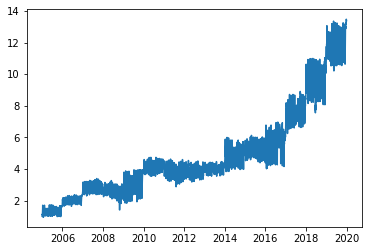

<Figure size 720x1440 with 0 Axes>

In [49]:
plt.plot( df_train.Data,df_train.Último)
plt.figure(figsize=(10,20))

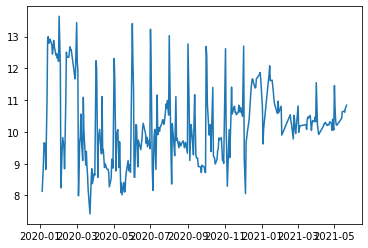

In [50]:
plt.plot( df_test.Data,df_test.Último)

In [51]:
df.agg({'Data': ['min', 'max']})

,Data
min,2005-01-04
max,2021-12-05


In [52]:
# colocando informações de mês, dia, dia da semana e dia do ano na base de treinamento.

df_train['mês']       = pd.DatetimeIndex(df_train.Data).month
df_train['dia']       = pd.DatetimeIndex(df_train.Data).day
df_train['weekday']   = pd.DatetimeIndex(df_train.Data).weekday
df_train['dayofyear'] = pd.DatetimeIndex(df_train.Data).dayofyear


In [53]:
df_train['valor_atual']    = df_train['Último'].shift(1).copy()
df_train['valor_anterior'] = df_train['Último'].shift(2).copy()
df_train['diff_valor']    = (df_train['valor_atual']-df_train['valor_anterior'])

In [54]:

# Calculo da média móvel adaptativa
# df_train['ama'] = (df_train['Var%']/(df_train['Var%'].rolling(3).sum())).round(3)
# Média móvel do últimos 3 dias
df_train['media_mov'] = df_train['Último'].rolling(3).mean().round(3)

In [55]:
df_train.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,ibov,usd,mês,dia,weekday,dayofyear,valor_atual,valor_anterior,diff_valor,media_mov
0,2005-01-02,1.01,1.00,1.02,1.00,6740000.0,0.0100,24149.46,2.6080,1,2,6,2,NaN,NaN,NaN,NaN
1,2005-01-03,1.14,1.13,1.14,1.11,17680000.0,0.0179,27729.98,2.6295,1,3,0,3,1.01,NaN,NaN,NaN
2,2005-01-04,1.10,1.12,1.12,1.09,9990000.0,0.0092,26773.83,2.6588,1,4,1,4,1.14,1.01,0.13,1.083
3,2005-01-06,1.11,1.10,1.12,1.09,14620000.0,0.0183,25948.83,2.4566,1,6,3,6,1.10,1.14,-0.04,1.117
4,2005-01-07,1.12,1.13,1.13,1.12,5710000.0,-0.0088,25311.44,2.3565,1,7,4,7,1.11,1.10,0.01,1.110


In [56]:
df_test.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,ibov,usd
0,2020-01-04,8.13,8.37,8.37,8.12,34100000.0,-0.0582,70966.70,5.2493
1,2020-01-06,8.95,8.73,9.03,8.65,38740000.0,0.0260,88620.10,5.3633
2,2020-01-07,9.66,9.54,9.74,9.51,25430000.0,0.0209,96203.20,5.3174
3,2020-01-09,9.63,9.46,9.63,9.44,25130000.0,0.0329,102167.65,5.3960
4,2020-01-10,8.82,8.77,8.84,8.68,22480000.0,0.0114,95478.52,5.6437


In [57]:
# colocando informações de mês, dia, dia da semana e dia do ano

df_test['mês']       = pd.DatetimeIndex(df_test.Data).month
df_test['dia']       = pd.DatetimeIndex(df_test.Data).day
df_test['weekday']   = pd.DatetimeIndex(df_test.Data).weekday
df_test['dayofyear'] = pd.DatetimeIndex(df_test.Data).dayofyear

In [58]:
df_test['valor_atual']    = df_test['Último'].shift(1).copy()
df_test['valor_anterior'] = df_test['Último'].shift(2).copy()
df_test['diff_valor']    = (df_test['valor_atual']-df_test['valor_anterior'])

In [59]:

# Calculo da média móvel adaptativa
# df_test['ama'] = (df_test['Var%']/(df_test['Var%'].rolling(3).sum())).round(3)
# média móvel dos últimos 3 dias
df_test['media_mov'] = df_test['Último'].rolling(3).mean().round(3)

In [60]:
df_test.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,ibov,usd,mês,dia,weekday,dayofyear,valor_atual,valor_anterior,diff_valor,media_mov
0,2020-01-04,8.13,8.37,8.37,8.12,34100000.0,-0.0582,70966.70,5.2493,1,4,5,4,NaN,NaN,NaN,NaN
1,2020-01-06,8.95,8.73,9.03,8.65,38740000.0,0.0260,88620.10,5.3633,1,6,0,6,8.13,NaN,NaN,NaN
2,2020-01-07,9.66,9.54,9.74,9.51,25430000.0,0.0209,96203.20,5.3174,1,7,1,7,8.95,8.13,0.82,8.913
3,2020-01-09,9.63,9.46,9.63,9.44,25130000.0,0.0329,102167.65,5.3960,1,9,3,9,9.66,8.95,0.71,9.413
4,2020-01-10,8.82,8.77,8.84,8.68,22480000.0,0.0114,95478.52,5.6437,1,10,4,10,9.63,9.66,-0.03,9.370


In [61]:
df_test.isnull().sum(), df_train.isnull().sum(), df_test.isna().sum(), df_train.isna().sum()

(Data              0
 Último            0
 Abertura          0
 Máxima            0
 Mínima            0
 Vol.              0
 Var%              0
 ibov              0
 usd               4
 mês               0
 dia               0
 weekday           0
 dayofyear         0
 valor_atual       1
 valor_anterior    2
 diff_valor        2
 media_mov         2
 dtype: int64, Data              0
 Último            0
 Abertura          0
 Máxima            0
 Mínima            0
 Vol.              0
 Var%              0
 ibov              0
 usd               0
 mês               0
 dia               0
 weekday           0
 dayofyear         0
 valor_atual       1
 valor_anterior    2
 diff_valor        2
 media_mov         2
 dtype: int64, Data              0
 Último            0
 Abertura          0
 Máxima            0
 Mínima            0
 Vol.              0
 Var%              0
 ibov              0
 usd               4
 mês               0
 dia               0
 weekday           0
 dayof

In [63]:
target   = 'Último'

cat_vars = (df_train.select_dtypes(include='object').columns.to_list())
num_vars = [col for col in df_train.columns if col not in cat_vars + ['Data','Último']]

features = num_vars

In [64]:
X_train = df_train.dropna().filter(features).copy()
y_train = df_train.dropna()[target].copy()
X_test  = df_test.dropna().filter(features).copy()
y_test  = df_test.dropna()[target].copy()

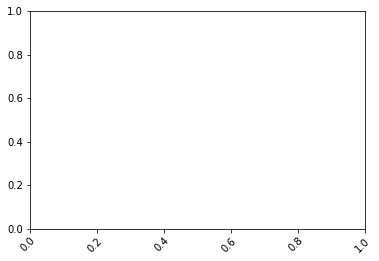

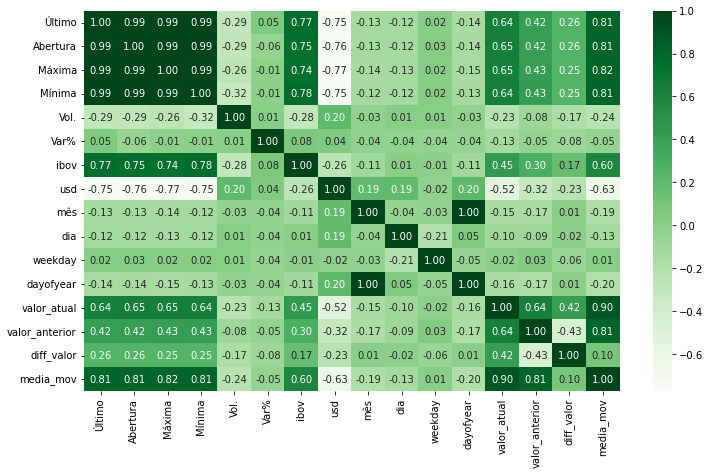

In [65]:
# Criando um mapa de calor para entender a correlação entre as variáveis

fig, ax = plt.subplots()

plt.figure(figsize=(12,7))
sns.heatmap(df_test.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Greens')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.show()

In [66]:
X_train.describe()

,Abertura,Máxima,Mínima,Vol.,Var%,ibov,usd,mês,dia,weekday,dayofyear,valor_atual,valor_anterior,diff_valor,media_mov
count,3705.000000,3705.000000,3705.000000,3.705000e+03,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000
mean,4.814362,4.873401,4.748278,1.739138e+07,0.000924,58306.656699,2.525742,6.520648,15.746559,2.365182,183.015924,4.811188,4.807835,0.003352,4.811172
std,2.829742,2.855570,2.800284,9.510572e+06,0.021801,17567.931645,0.772028,3.389679,8.769840,1.724624,103.487199,2.826151,2.823290,0.387233,2.815280
min,0.960000,0.980000,0.930000,1.520000e+06,-0.112200,23609.970000,1.538300,1.000000,1.000000,0.000000,2.000000,0.970000,0.970000,-2.720000,0.977000
25%,2.850000,2.890000,2.810000,1.115000e+07,-0.010900,48388.050000,1.880200,4.000000,8.000000,1.000000,94.000000,2.850000,2.850000,-0.080000,2.830000
50%,4.080000,4.130000,4.030000,1.567000e+07,0.000000,56863.910000,2.241500,7.000000,16.000000,2.000000,183.000000,4.080000,4.080000,0.000000,4.080000
75%,5.660000,5.730000,5.570000,2.130000e+07,0.011800,66278.890000,3.201200,9.000000,23.000000,4.000000,272.000000,5.650000,5.650000,0.110000,5.613000
max,13.490000,13.550000,13.310000,1.169000e+08,0.246100,117203.200000,4.263600,12.000000,31.000000,6.000000,365.000000,13.480000,13.480000,2.180000,13.433000


In [67]:
X_train.head(3)

,Abertura,Máxima,Mínima,Vol.,Var%,ibov,usd,mês,dia,weekday,dayofyear,valor_atual,valor_anterior,diff_valor,media_mov
2,1.12,1.12,1.09,9990000.0,0.0092,26773.83,2.6588,1,4,1,4,1.14,1.01,0.13,1.083
3,1.10,1.12,1.09,14620000.0,0.0183,25948.83,2.4566,1,6,3,6,1.10,1.14,-0.04,1.117
4,1.13,1.13,1.12,5710000.0,-0.0088,25311.44,2.3565,1,7,4,7,1.11,1.10,0.01,1.110


In [68]:
X_test.head(3)

,Abertura,Máxima,Mínima,Vol.,Var%,ibov,usd,mês,dia,weekday,dayofyear,valor_atual,valor_anterior,diff_valor,media_mov
2,9.54,9.74,9.51,25430000.0,0.0209,96203.20,5.3174,1,7,1,7,8.95,8.13,0.82,8.913
3,9.46,9.63,9.44,25130000.0,0.0329,102167.65,5.3960,1,9,3,9,9.66,8.95,0.71,9.413
4,8.77,8.84,8.68,22480000.0,0.0114,95478.52,5.6437,1,10,4,10,9.63,9.66,-0.03,9.370


In [69]:
y_test.head(3)

2    9.66
3    9.63
4    8.82
Name: Último, dtype: float64

In [70]:
y_train.head(3)

2    1.10
3    1.11
4    1.12
Name: Último, dtype: float64

In [71]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3705, 15), (3705,), (313, 15), (313,))

In [72]:
!pip install feature_engine

In [73]:
from sklearn.preprocessing import StandardScaler
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error      
from sklearn.metrics import median_absolute_error, r2_score
import numpy

# Função para comparar os resultados dos modelos

In [74]:
# Função para 


def log_results(modelo_objeto, nome_modelo, X_train, X_test, y_train, y_test):
    
    def adjusted_r2 (yt,ypt,Xt):                                        # Função r2 ajustado
      r2          = r2_score(yt,ypt)
      N           = len(yt)
      p           = Xt.shape[1]
      r2_ajustado = (1-((1-r2)*(N-1))/(N-p-1))
      return r2_ajustado
   
    def mape(yt, ypt):                                                   # Função MAPE
       mape = np.mean(np.abs((yt-ypt)/yt))
       return (mape)

# avaliando o Treino 
    y_pred_train      = modelo_objeto.predict(X_train)    
    r2_train          = round(r2_score(y_train, y_pred_train),3)                        # r2    
    r2_ajustado_train = round(adjusted_r2 (y_train,y_pred_train, X_train),3)            # r2 ajustado       
    mse_train         = round(mean_squared_error (y_train,y_pred_train),2)              # mse
    rmse_train        = round(np.sqrt(mse_train),2)                                     # RMSE   
    rmsle_train       = round(np.sqrt(mean_squared_log_error(y_train, y_pred_train)),3) # RMSLE    
    mae_train         = round(mean_absolute_error(y_train, y_pred_train),2)             # MAE   
    medae_train       = round(median_absolute_error(y_train, y_pred_train),2)           # MedAE  
    mape_train        = round(mape(y_train, y_pred_train),3)                            # MAPE

                    
# Avaliando teste
    y_pred_test = modelo_objeto.predict(X_test)   
    r2          = round(r2_score(y_test, y_pred_test),3)                                # r2    
    r2_ajustado = round(adjusted_r2 (y_test,y_pred_test, X_test),3)                     # r2 ajustado   
    mse         = round(mean_squared_error (y_test,y_pred_test),2)                      # mse
    rmse        = round(np.sqrt(mse),2)                                                 # RMSE    
    rmsle       = round(np.sqrt(mean_squared_log_error(y_test, y_pred_test)),3)         # RMSLE    
    mae         = round(mean_absolute_error(y_test, y_pred_test),2)                     # MAE
    medae       = round(median_absolute_error(y_test, y_pred_test),2)                   # MedAE    
    mape        = round(mape(y_test, y_pred_test),3)                                    # MAPE

 
    results=[]
    results.append([nome_modelo,'treino',r2_train,r2_ajustado_train,mse_train,rmse_train,rmsle_train,mae_train,medae_train,mape_train])
    results.append([nome_modelo,'teste',r2,r2_ajustado,mse,rmse,rmsle,mae,medae,mape])
    df_results = pd.DataFrame(results, columns=['nome_modelo','modo','r2','r2_ajustado','mse','rmse','rmsle','mae','medae','mape'])
    return df_results


# Regressão Linear


In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3705 entries, 2 to 3706
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Abertura        3705 non-null   float64
 1   Máxima          3705 non-null   float64
 2   Mínima          3705 non-null   float64
 3   Vol.            3705 non-null   float64
 4   Var%            3705 non-null   float64
 5   ibov            3705 non-null   float64
 6   usd             3705 non-null   float64
 7   mês             3705 non-null   int64  
 8   dia             3705 non-null   int64  
 9   weekday         3705 non-null   int64  
 10  dayofyear       3705 non-null   int64  
 11  valor_atual     3705 non-null   float64
 12  valor_anterior  3705 non-null   float64
 13  diff_valor      3705 non-null   float64
 14  media_mov       3705 non-null   float64
dtypes: float64(11), int64(4)
memory usage: 463.1 KB
None


In [77]:
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313 entries, 2 to 314
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Abertura        313 non-null    float64
 1   Máxima          313 non-null    float64
 2   Mínima          313 non-null    float64
 3   Vol.            313 non-null    float64
 4   Var%            313 non-null    float64
 5   ibov            313 non-null    float64
 6   usd             313 non-null    float64
 7   mês             313 non-null    int64  
 8   dia             313 non-null    int64  
 9   weekday         313 non-null    int64  
 10  dayofyear       313 non-null    int64  
 11  valor_atual     313 non-null    float64
 12  valor_anterior  313 non-null    float64
 13  diff_valor      313 non-null    float64
 14  media_mov       313 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB
None


In [78]:
lr_model = Pipeline(steps=[
        ('standard_scaler',SklearnTransformerWrapper(transformer=StandardScaler(),variables=num_vars)),
        ('linear_reg', LinearRegression())
])

In [79]:
# Execute para criar o modelo
lr_model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standard_scaler',
                 SklearnTransformerWrapper(transformer=StandardScaler(copy=True,
                                                                      with_mean=True,
                                                                      with_std=True),
                                           variables=['Abertura', 'Máxima',
                                                      'Mínima', 'Vol.', 'Var%',
                                                      'ibov', 'usd', 'mês',
                                                      'dia', 'weekday',
                                                      'dayofyear',
                                                      'valor_atual',
                                                      'valor_anterior',
                                                      'diff_valor',
                                                      'media_mov'])),
                ('linear_reg',
        

In [80]:
lr_results = log_results(lr_model, 'Regressão Linear', X_train, X_test, y_train, y_test)
lr_results

,nome_modelo,modo,r2,r2_ajustado,mse,rmse,rmsle,mae,medae,mape
0,Regressão Linear,treino,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Regressão Linear,teste,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Ridge

In [81]:
from sklearn.linear_model import Ridge

In [82]:

# criando o Pipeline do modelo Ridge
ridge_model = Pipeline(steps=[
    ('standart_scaler', SklearnTransformerWrapper(transformer=StandardScaler(),variables=num_vars)),
    ('ridge_reg',Ridge())
])
#Treinando o modelo
ridge_model.fit(X_train,y_train)
# aplicando a função
ridge_results = log_results(ridge_model, 'Ridge', X_train, X_test, y_train, y_test)
ridge_results

,nome_modelo,modo,r2,r2_ajustado,mse,rmse,rmsle,mae,medae,mape
0,Ridge,treino,1.000,1.000,0.00,0.0,0.006,0.02,0.02,0.006
1,Ridge,teste,0.996,0.995,0.01,0.1,0.008,0.07,0.06,0.007


# Árvore de decisão

In [83]:
from sklearn.tree import  DecisionTreeRegressor

In [84]:
#criando o pipeline do modelo árvore de decisão
tree_model = Pipeline(steps=[
    ('decision_tree', DecisionTreeRegressor(random_state=30, max_depth=3))
])
# treinando o modelo
tree_model.fit(X_train, y_train)
tree_results = log_results(tree_model, 'Decision Tree', X_train, X_test, y_train, y_test)
tree_results

,nome_modelo,modo,r2,r2_ajustado,mse,rmse,rmsle,mae,medae,mape
0,Decision Tree,treino,0.981,0.980,0.16,0.40,0.088,0.33,0.30,0.096
1,Decision Tree,teste,0.810,0.801,0.30,0.55,0.050,0.46,0.44,0.046


# Treinando Random Forrest


In [85]:
from sklearn.ensemble import RandomForestRegressor

In [86]:


rf_model = Pipeline(steps=[                          
    ('random_forrest', RandomForestRegressor(random_state=30, max_depth=3))
])
#treinando o modelo
rf_model.fit(X_train, y_train)
rf_results= log_results(rf_model, 'Random Forest', X_train, X_test, y_train, y_test)
rf_results

,nome_modelo,modo,r2,r2_ajustado,mse,rmse,rmsle,mae,medae,mape
0,Random Forest,treino,0.983,0.983,0.13,0.36,0.084,0.30,0.28,0.091
1,Random Forest,teste,0.856,0.848,0.23,0.48,0.043,0.41,0.40,0.040


# LGBM

In [87]:
from lightgbm import LGBMRegressor

In [88]:

#criando pipeline do modelo LGBM
lgbm_model = Pipeline (steps=[
    ('lgbm', LGBMRegressor(random_state=30))
])
#treinando o modelo
lgbm_model.fit(X_train, y_train)
lgbm_results = log_results(lgbm_model, 'LGMB Regression', X_train, X_test, y_train, y_test)
lgbm_results

,nome_modelo,modo,r2,r2_ajustado,mse,rmse,rmsle,mae,medae,mape
0,LGMB Regression,treino,1.00,1.00,0.00,0.00,0.004,0.02,0.01,0.004
1,LGMB Regression,teste,0.99,0.99,0.02,0.14,0.011,0.10,0.09,0.010


# XGBoost

In [89]:
from xgboost import XGBRegressor


In [90]:

#Criando pipeline do modelo
xgb_model = Pipeline (steps=[
    ('xgb', XGBRegressor(random_state=30))
])
#treinando o modelo
xgb_model.fit(X_train,y_train)
xgb_results = log_results(xgb_model,'XGBoost', X_train, X_test, y_train, y_test)
xgb_results


[01:08:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,nome_modelo,modo,r2,r2_ajustado,mse,rmse,rmsle,mae,medae,mape
0,XGBoost,treino,1.00,1.000,0.00,0.00,0.006,0.02,0.02,0.006
1,XGBoost,teste,0.99,0.989,0.02,0.14,0.012,0.10,0.09,0.011


# Comparando os modelos


In [91]:
model_results = pd.concat([lr_results,ridge_results,tree_results, rf_results, lgbm_results,xgb_results])

In [92]:
model_results.sort_values(by=['modo','r2_ajustado'], ascending=False)

,nome_modelo,modo,r2,r2_ajustado,mse,rmse,rmsle,mae,medae,mape
0,Regressão Linear,treino,1.000,1.000,0.00,0.00,0.000,0.00,0.00,0.000
0,Ridge,treino,1.000,1.000,0.00,0.00,0.006,0.02,0.02,0.006
0,LGMB Regression,treino,1.000,1.000,0.00,0.00,0.004,0.02,0.01,0.004
0,XGBoost,treino,1.000,1.000,0.00,0.00,0.006,0.02,0.02,0.006
0,Random Forest,treino,0.983,0.983,0.13,0.36,0.084,0.30,0.28,0.091
0,Decision Tree,treino,0.981,0.980,0.16,0.40,0.088,0.33,0.30,0.096
1,Regressão Linear,teste,1.000,1.000,0.00,0.00,0.000,0.00,0.00,0.000
1,Ridge,teste,0.996,0.995,0.01,0.10,0.008,0.07,0.06,0.007
1,LGMB Regression,teste,0.990,0.990,0.02,0.14,0.011,0.10,0.09,0.010
1,XGBoost,teste,0.990,0.989,0.02,0.14,0.012,0.10,0.09,0.011


In [93]:
xgb_model[-1].get_params().keys()

dict_keys(['base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'importance_type', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'n_estimators', 'n_jobs', 'nthread', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'seed', 'silent', 'subsample', 'verbosity'])

# Usando o GRID SEARCH


In [94]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.model_selection import KFold

parameters = {'xgb__learning_rate': [0.01, 0.015, 0.025], 
              'xgb__n_estimators': [500, 1000, 2000],
              'xgb__max_depth': [3, 5],
              'xgb__subsample': [0.6, 0.7, 0.8],
              'xgb__colsample_bytree': [0.6, 0.7, 0.8]}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(xgb_model, parameters, cv=kfold, n_jobs=-1, verbose=2, refit=True)


In [95]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   59.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed: 34.0min finished


[01:42:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('xgb',
                                        XGBRegressor(base_score=0.5,
                                                     booster='gbtree',
                                                     colsample_bylevel=1,
                                                     colsample_bynode=1,
                                                     colsample_bytree=1,
                                                     gamma=0,
                                                     importance_type='gain',
                                                     learning_rate=0.1,
                                                     max_delta_step=0,
                                                     max_depth=3,
                                                     min_child_weight=1,
                               

In [96]:
best_params = grid_search.best_params_
best_params

{'xgb__colsample_bytree': 0.7,
 'xgb__learning_rate': 0.01,
 'xgb__max_depth': 5,
 'xgb__n_estimators': 2000,
 'xgb__subsample': 0.6}

In [97]:
results = pd.DataFrame(grid_search.cv_results_)
results.sort_values(by='rank_test_score').head(1)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgb__colsample_bytree,param_xgb__learning_rate,param_xgb__max_depth,param_xgb__n_estimators,param_xgb__subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
69,10.125482,0.054096,0.127911,0.003847,0.7,0.01,5,2000,0.6,"{'xgb__colsample_bytree': 0.7, 'xgb__learning_...",0.999851,0.999843,0.999815,0.999841,0.999848,0.99984,0.000013,1


In [98]:
best_model = grid_search

In [99]:
def adjusted_r2 (yt,ypt,Xt):                                        # Função r2 ajustado
   r2          = r2_score(yt,ypt)
   N           = len(yt)
   p           = Xt.shape[1]
   r2_ajustado = (1-((1-r2)*(N-1))/(N-p-1))
   return r2_ajustado

In [100]:
y_pred_test_best = best_model.predict(X_test)
r2_ajustado_best = round(adjusted_r2(y_test,y_pred_test_best,X_test),3)
r2_ajustado_best

0.987

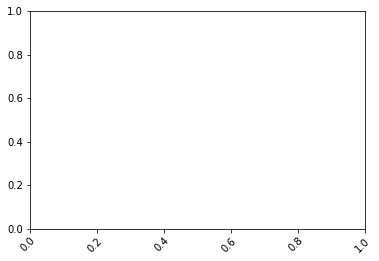

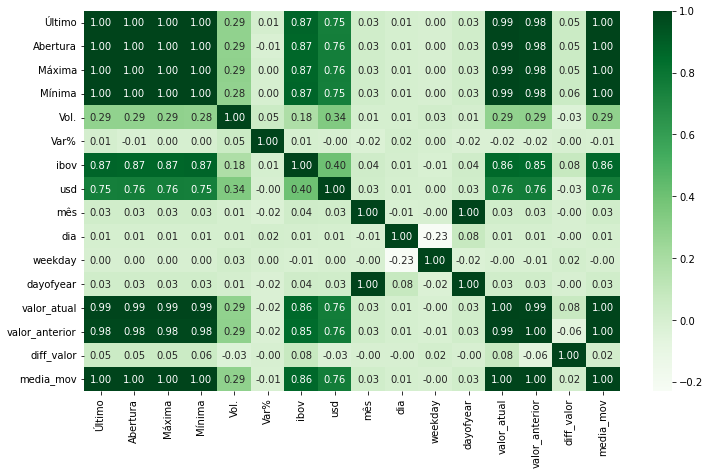

In [101]:
# plotando o mapa de calor da correlação entre as variáveis
fig, ax = plt.subplots()

plt.figure(figsize=(12,7))
sns.heatmap(df_train.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Greens')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.show()

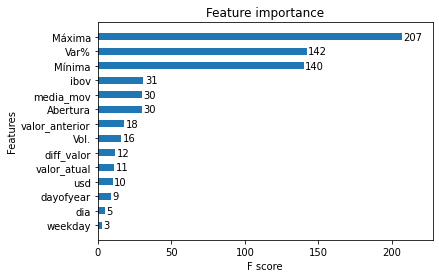

In [102]:
from xgboost import plot_importance
plot_importance(xgb_model[-1], height=.5,grid=False)
